In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/AIML_IITG/Datasets/iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
df.isnull().sum()

,0
sepal.length,0
sepal.width,0
petal.length,0
petal.width,0
variety,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.shape

(150, 5)

In [7]:
df.duplicated().sum()

np.int64(1)

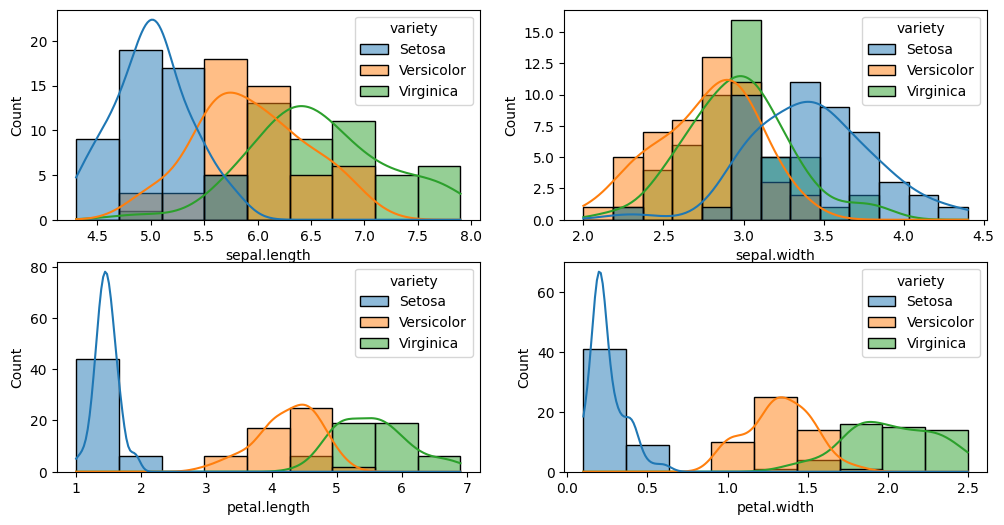

In [60]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,6))
sns.histplot(x="sepal.length",kde=True,data=df,hue="variety",ax=ax[0,0])
sns.histplot(x="sepal.width",kde=True,data=df,hue="variety",ax=ax[0,1])
sns.histplot(x="petal.length",kde=True,data=df,hue="variety",ax=ax[1,0])
sns.histplot(x="petal.width",kde=True,data=df,hue="variety",ax=ax[1,1])
plt.show()

array([[<Axes: title={'center': 'Setosa'}>,
        <Axes: title={'center': 'Versicolor'}>],
       [<Axes: title={'center': 'Virginica'}>, <Axes: >]], dtype=object)

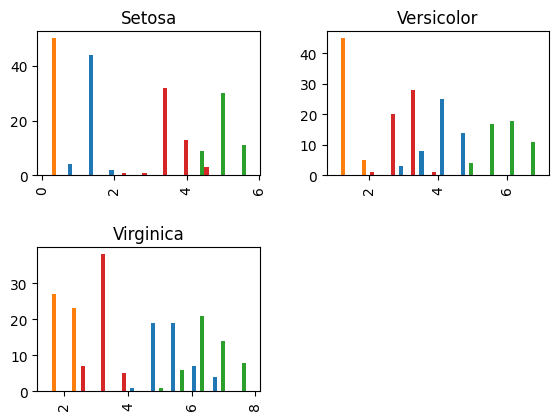

In [59]:
h = df["variety"].unique()
# sns.pairplot(df.drop(columns="variety",axis=1),hue=h,diag_kind="kde")
df.hist(column=['petal.length','petal.width','sepal.length','sepal.width'],by=df["variety"])

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop("variety",axis=1)
y = df["variety"]

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.3)

In [29]:
LDA = LinearDiscriminantAnalysis(n_components=2)
x_train = LDA.fit_transform(x_train,y_train)
x_test = LDA.transform(x_test)

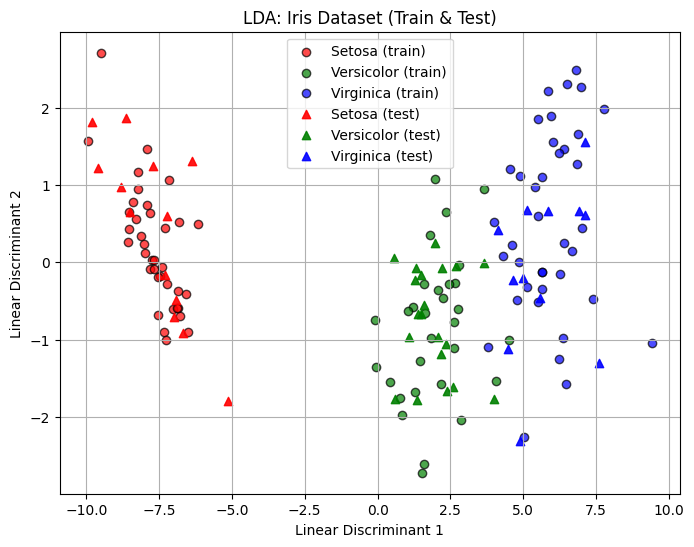

In [33]:
plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b']
target_names = df["variety"].unique()
# Plot training data
for label, color, name in zip([0,1,2], colors, target_names):
    plt.scatter(x_train[y_train==label, 0],
                x_train[y_train==label, 1],
                color=color, marker='o', label=f"{name} (train)", alpha=0.7, edgecolors='k')

# Plot test data
for label, color, name in zip([0,1,2], colors, target_names):
    plt.scatter(x_test[y_test==label, 0],
                x_test[y_test==label, 1],
                color=color, marker='^', label=f"{name} (test)", alpha=0.9)

plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('LDA: Iris Dataset (Train & Test)')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression,LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
model

LogisticRegression()

In [35]:
y_pred = model.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [37]:
acc = accuracy_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

In [38]:
acc

1.0

In [39]:
conf

array([[13,  0,  0],
       [ 0, 20,  0],
       [ 0,  0, 12]])

In [41]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



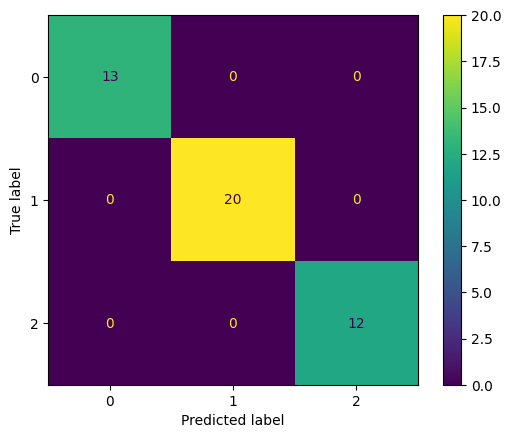

In [42]:
ConfusionMatrixDisplay(conf).plot()